In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.ticker as ticker
film = pd.read_csv(r"C:\Users\Ngoc Minh\Downloads\big data\Nhom_5_Mid_term_1\df_final.csv")

In [2]:
pd.set_option('display.max_columns', None) # hiển thị full cột
# pd.set_option('display.max_rows', None) -  hiển thị full dòng 

__Kiểm tra thông tin bộ dữ liệu__

In [3]:
film.head()

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,show_id,slot type,ticket type,ticket price,popcorn,DOB,Gender,Quận/Huyện,Tỉnh,job,industry,title,director,country,rating,listed_in,Age,Time of day,Age Group
0,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074925,2019-05-06,1900-01-01 18:15:00,G04,3,s966,ĐƠN,Thành viên,45000,Không,1999-04-18,Nữ,Thanh Khê,Đà Nẵng,student,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-25)
1,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074924,2019-05-06,1900-01-01 18:15:00,G03,3,s966,ĐƠN,Thành viên,45000,Không,1999-04-18,Nữ,Thanh Khê,Đà Nẵng,student,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-25)
2,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097042,2019-05-22,1900-01-01 20:45:00,E04,2,s1231,ĐƠN,Thành viên,45000,Không,1998-04-16,Nam,Sơn Trà,Đà Nẵng,student,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-25)
3,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097041,2019-05-22,1900-01-01 20:45:00,E03,2,s1231,ĐƠN,Thành viên,45000,Không,1998-04-16,Nam,Sơn Trà,Đà Nẵng,student,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-25)
4,10130052019B0141,emp005,2019-05-30,90000,0000000034,20106761,2019-05-30,1900-01-01 19:30:00,F04,1,s1232,ĐƠN,Thành viên,45000,Không,1998-04-16,Nam,Sơn Trà,Đà Nẵng,student,health service,NGÔI ĐỀN KỲ QUÁI (Pee Nak),Phontharis Chotkijsadarsopon,Thailand,PG-13,"Comedy, Horror",21,Tối,Thanh niên (18-25)


In [ ]:
film.info()

In [64]:
# Tách phần chữ 'KH'
film['prefix'] = film['customerid'].str.extract(r'([A-Za-z]+)')

# Tách phần số
film['number'] = film['customerid'].str.extract(r'(\d+)')

In [65]:
film['prefix'].value_counts()

prefix
KH      11088
WEBS        9
Name: count, dtype: int64

In [80]:
film['saledate'] = pd.to_datetime(film['saledate'])
film['weekday'] = film['saledate'].dt.dayofweek  # 0=Monday, 6=Sunday

In [81]:
# chuyển kiểu dữ liệu của saledate từ object thành datetime, bỏ năm đi (2019)
film['saledate'] = film['saledate'].dt.strftime('%m-%d')

In [121]:
total_weekday = film.groupby("weekday")['ticket price'].sum()
pd.DataFrame(total_weekday)
total_weekday = total_weekday.reset_index()
total_weekday

,weekday,ticket price
0,0,181800000
1,1,169290000
2,2,218675000
3,3,265725000
4,4,244305000
5,5,221355000
6,6,312075000


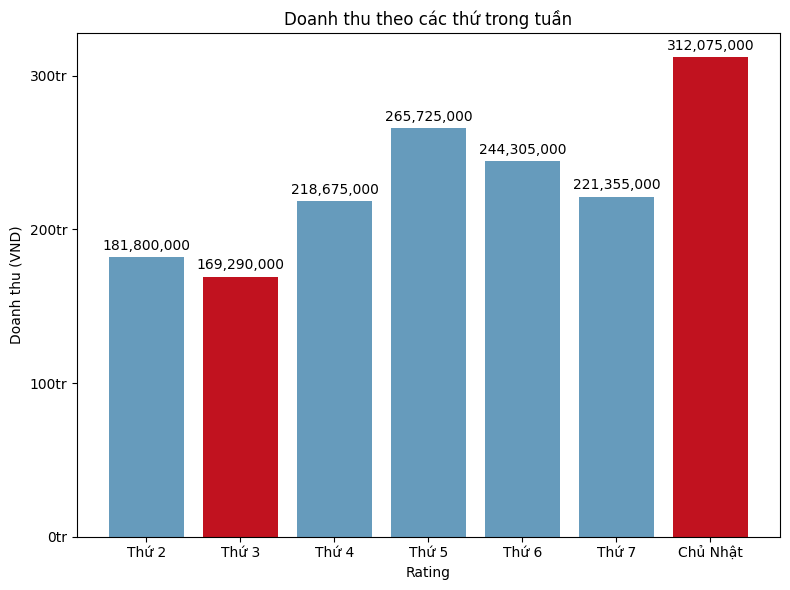

In [127]:
fig, ax = plt.subplots(figsize=(8, 6))

# Khởi tạo màu mặc định
custom_colors = ['#669BBC'] * len(total_weekday)

# Tìm vị trí max / min
max_idx = total_weekday['ticket price'].values.argmax()
min_idx = total_weekday['ticket price'].values.argmin()

# Highlight màu
custom_colors[max_idx] = '#C1121F'  
custom_colors[min_idx] = '#C1121F'  

weekday_labels = ['Thứ 2', 'Thứ 3', 'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ Nhật']
total_weekday_barplot = ax.bar(weekday_labels, total_weekday['ticket price'], 
                               color=custom_colors)

ax.set_title("Doanh thu theo các thứ trong tuần")
ax.set_xlabel("Rating")
ax.yaxis.set_major_locator(ticker.MultipleLocator(100_000_000))
# ax.yaxis.set_minor_locator(ticker.AutoMinorLocator()) : thêm tick nhỏ hơn trên yxis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))
ax.bar_label(total_weekday_barplot, labels=[f"{v:,}" for v in total_weekday['ticket price']], padding=3)
ax.set_ylabel("Doanh thu (VND)")

plt.tight_layout()
plt.show()

__LINE CHART DOANH SỐ VÀ BAR CHART DOANH THU THEO NGÀY TRONG THÁNG 5/2019__

In [82]:
# Nhóm theo ngày
daily_summary = film.groupby('saledate').agg({
    'ticket price': 'sum',
    'ticketcode': 'count'
}).reset_index()

In [ ]:
# Khởi tạo màu mặc định cho tất cả các cột
custom_colors = ['#669BBC'] * len(daily_summary)

# Highlight doanh thu cao nhất → màu đỏ
custom_colors[daily_summary['ticket price'].idxmax()] = '#C1121F'  

# Highlight doanh thu thấp nhất → màu xanh
custom_colors[daily_summary['ticket price'].idxmin()] = '#C1121F'  

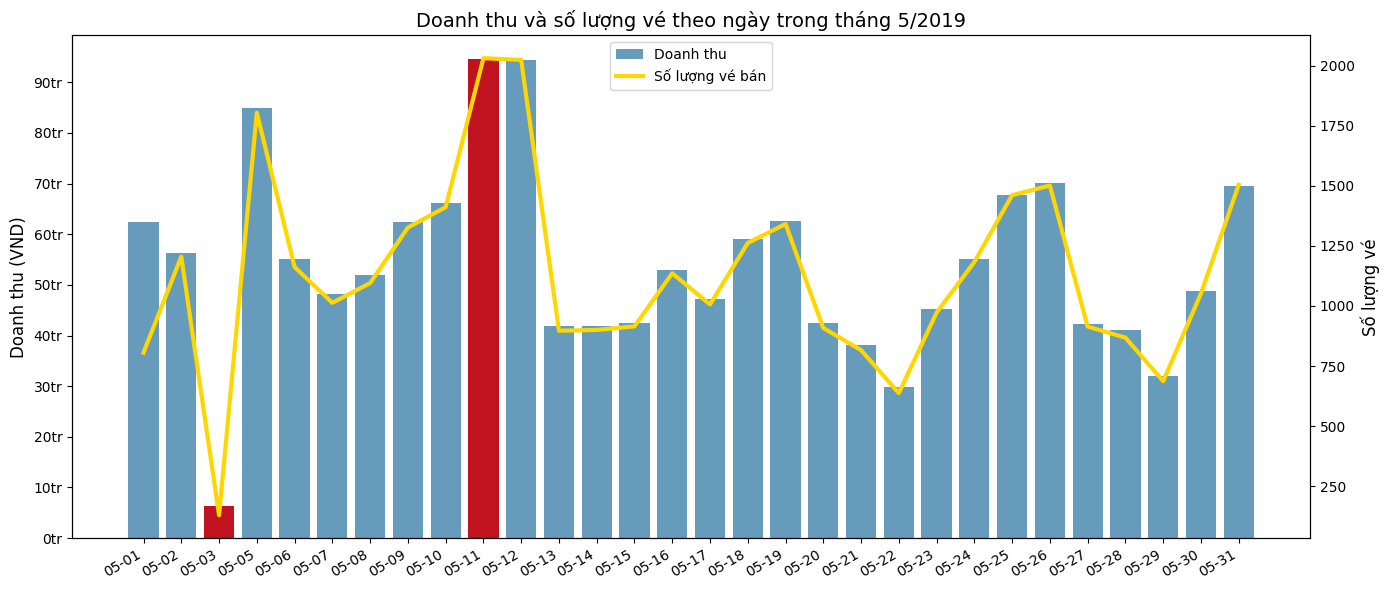

In [89]:
 # Tạo figure và 2 trục y
fig, ax1 = plt.subplots(figsize=(14, 6))

# Vẽ cột doanh thu
bar = ax1.bar(daily_summary['saledate'], daily_summary['ticket price'], 
              label='Doanh thu', color=custom_colors)

# Thiết lập trục y bên trái
ax1.set_ylabel('Doanh thu (VND)', fontsize=12)
ax1.tick_params(axis='y')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10_000_000))

# Tạo trục y bên phải
ax2 = ax1.twinx()

# Vẽ đường số vé
line = ax2.plot(daily_summary['saledate'], daily_summary['ticketcode'],
                color='gold', linewidth=3, label='Số lượng vé bán')


# Thiết lập trục y bên phải
ax2.set_ylabel('Số lượng vé', fontsize=12)
ax2.tick_params(axis='y')
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Tiêu đề
plt.title('Doanh thu và số lượng vé theo ngày trong tháng 5/2019', fontsize=14)

# Gộp legend cả 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper center')

# Format ngày cho trục x
fig.autofmt_xdate()

plt.tight_layout()
plt.show()


__Bộ dữ liệu về doanh thu của 1 rạp phim ở thành phố Đà Nẵng trong tháng 5/2019__

__BAR CHART CHO DOANH THU THEO MÃ XẾP LOẠI PHIM__

In [10]:
# doanh thu được nhóm theo mã xếp loại phim 
total_rating = film.groupby('rating')['ticket price'].sum().sort_values(ascending=False)

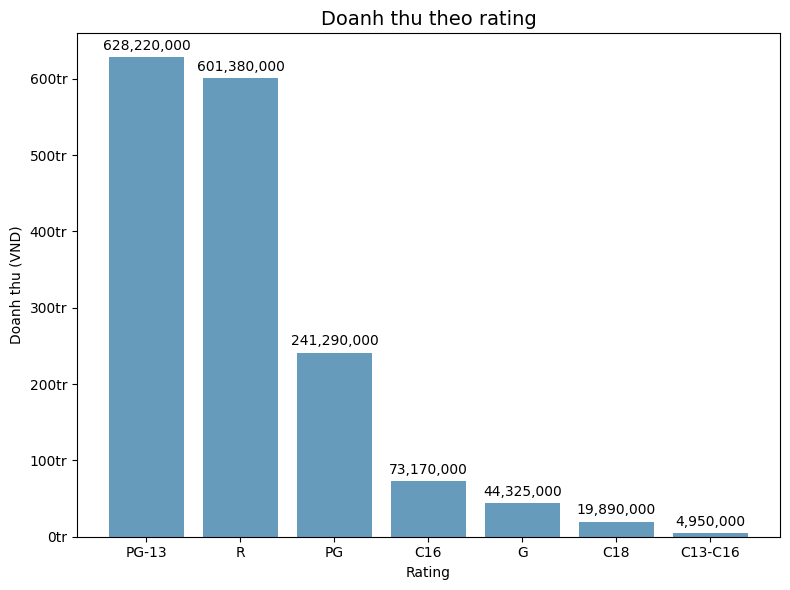

In [90]:
fig, ax = plt.subplots(figsize=(8, 6))

total_rating_barplot = ax.bar(total_rating.index, total_rating.values, color = "#669BBC")

ax.set_title("Doanh thu theo rating", fontsize = 14)
ax.set_xlabel("Rating")
ax.yaxis.set_major_locator(ticker.MultipleLocator(100_000_000))
# ax.yaxis.set_minor_locator(ticker.AutoMinorLocator()) : thêm tick nhỏ hơn trên yxis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))
ax.bar_label(total_rating_barplot, labels=[f"{v:,}" for v in total_rating.values], padding=3)
ax.set_ylabel("Doanh thu (VND)")

plt.tight_layout()
plt.show()

__PIE CHART VÀ BAR CHART CHO TỈ LỆ DOANH THU VÀ DOANH THU THEO GIỚI TÍNH__

In [ ]:
# doanh thu được nhóm theo giới tính (nam, nữ)
total_bysex = film.groupby('Gender')['ticket price'].sum()
print(total_bysex)

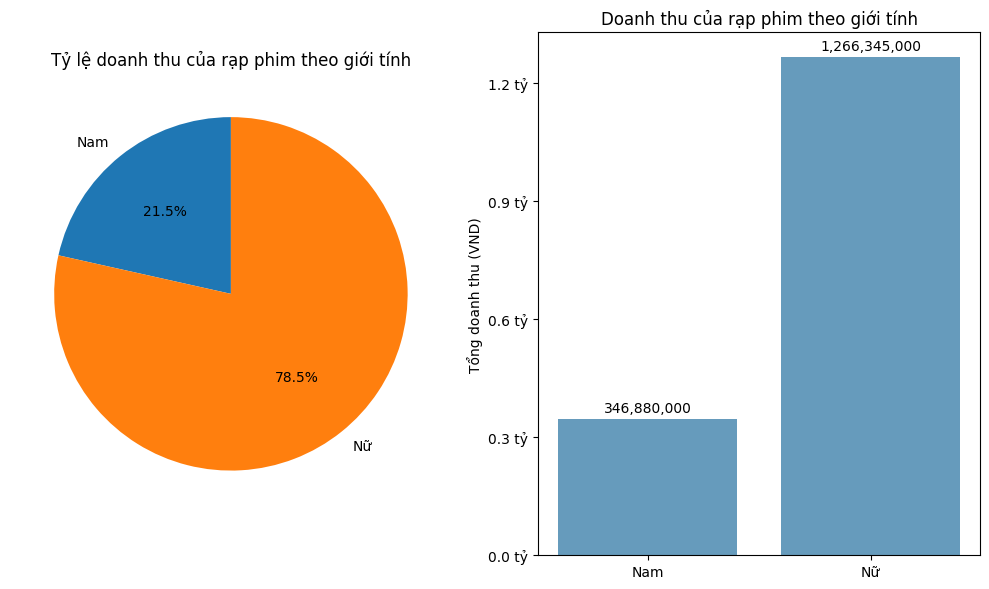

In [103]:
fig, ax = plt.subplots(figsize=(10,6), ncols=2, nrows=1)

ax[0].pie(total_bysex.values, labels=total_bysex.index,
       autopct='%1.1f%%',
       startangle=90)
ax[0].set_title("Tỷ lệ doanh thu của rạp phim theo giới tính")

total_bysex_bar = ax[1].bar(total_bysex.index, total_bysex.values, color = "#669BBC")
ax[1].set_title("Doanh thu của rạp phim theo giới tính")
ax[1].set_ylabel("Tổng doanh thu (VND)")
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(300_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000000:.1f} tỷ"))
ax[1].bar_label(total_bysex_bar, labels=[f"{v:,}" for v in total_bysex.values], padding=3)

plt.tight_layout()
plt.show()

__BAR CHART DOANH THU THU THEO HÀNG GHẾ TỪ A-K__

In [ ]:
# lấy tên hàng ghế từ A-K
film['slot_letter'] = film['slot'].str[0]
film['slot_number'] = film['slot'].str.extract(r'(\d+)').astype(int)  # Lấy số và ép kiểu    
# 17A, 17B, 17C, 17D, 17E, 17F, 17G, 17H, 19I, 16J, 19K

In [15]:
# film['slot_letter'] = film['slot'].str.extract(r'([A-Z])') # Lấy ký tự chữ

In [ ]:
# doanh thu được nhóm theo hàng ghế A-K
total_slot = film.groupby('slot_letter')['ticket price'].sum()
print(total_slot)

total_slot = total_slot.sort_values(ascending=False)

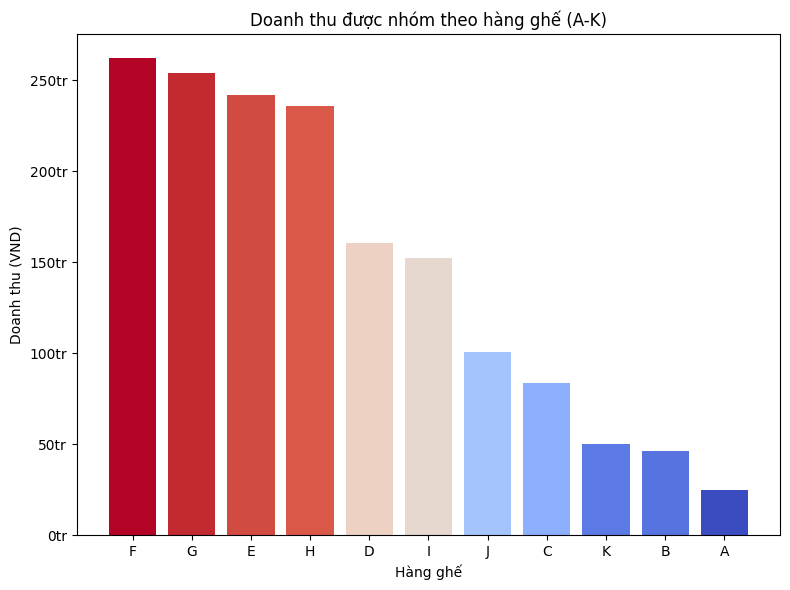

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Normalize giá trị để ánh xạ màu
norm = plt.Normalize(total_slot.values.min(), total_slot.values.max())
colors = cm.coolwarm(norm(total_slot.values))  

# Vẽ từng đơn hàng theo thời gian
total_slot_barplot = ax.bar(total_slot.index, total_slot.values, color = colors)

ax.set_title("Doanh thu được nhóm theo hàng ghế (A-K)")
ax.set_xlabel("Hàng ghế")
ax.yaxis.set_major_locator(ticker.MultipleLocator(50_000_000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))
# ax.bar_label(total_slot_barplot, labels=[f"{v:,}" for v in total_slot.values], padding=3)
ax.set_ylabel("Doanh thu (VND)")

plt.tight_layout()
plt.show()

__BAR CHART SỐ LƯỢNG VÉ THEO HÀNG GHẾ TỪ A-K__

In [ ]:
slot_ticketcode = film.groupby("slot_letter")['ticketcode'].count()
print(slot_ticketcode)
slot_ticketcode = slot_ticketcode.sort_values(ascending=False)

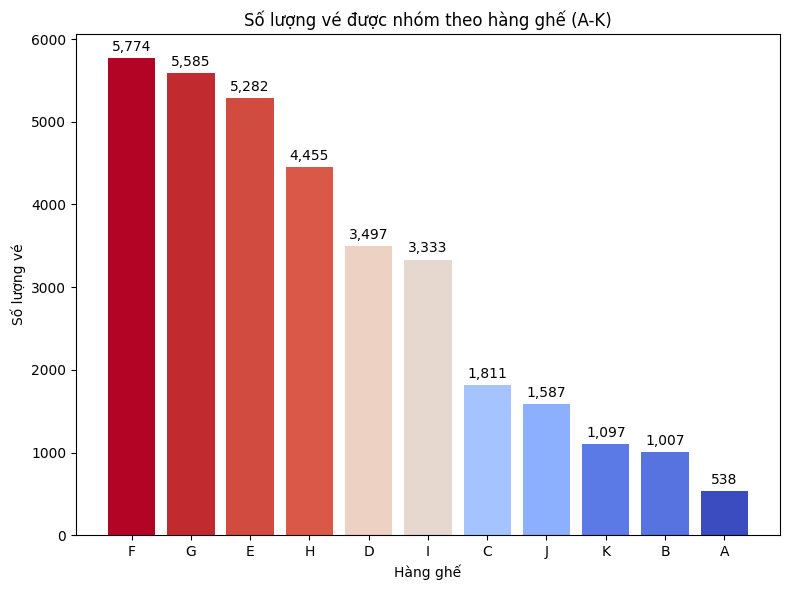

In [99]:
fig, ax = plt.subplots(figsize=(8, 6))

# Normalize giá trị để ánh xạ màu
norm = plt.Normalize(slot_ticketcode.values.min(), slot_ticketcode.values.max())
colors1 = cm.coolwarm(norm(slot_ticketcode.values)) 

slot_ticketcode_barplot = ax.bar(slot_ticketcode.index, slot_ticketcode.values, color = colors)

ax.set_title("Số lượng vé được nhóm theo hàng ghế (A-K)")
ax.set_xlabel("Hàng ghế")
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.bar_label(slot_ticketcode_barplot, labels=[f"{v:,}" for v in slot_ticketcode.values], padding=3)
ax.set_ylabel("Số lượng vé")

plt.tight_layout()
plt.show()

__BAR CHART DOANH THU THEO NHÀ SẢN XUẤT PHIM__

In [ ]:
# doanh thu được nhóm theo nhà sản xuất
total_director = film.groupby('director')['ticket price'].sum()
total_director = total_director.sort_values(ascending=False)
print(total_director)

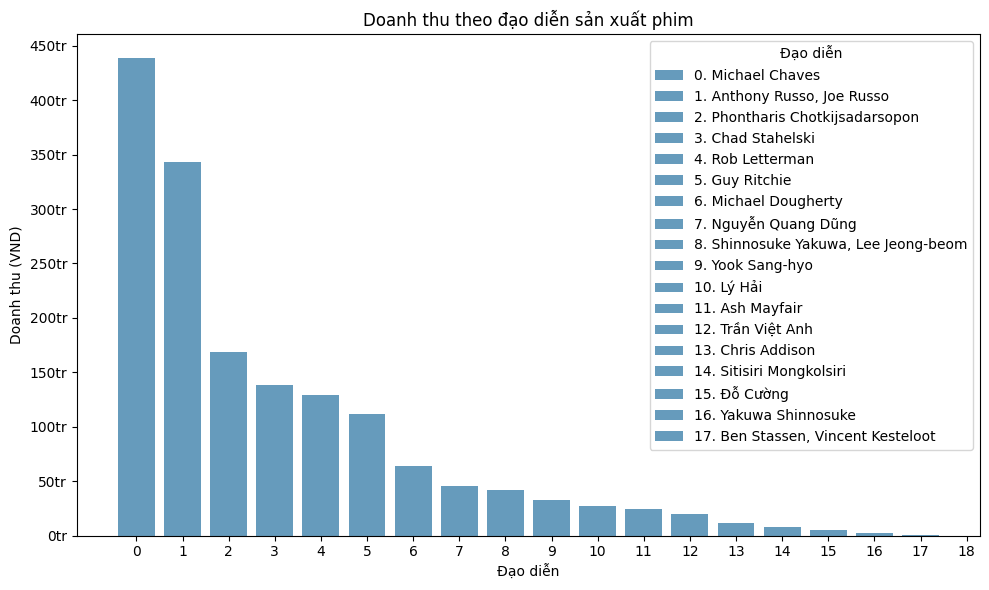

In [104]:
fig, ax = plt.subplots(figsize=(10, 6))

# Gán số thứ tự cho mỗi director
index_director = range(0, len(total_director.index) + 1)

total_director_barplot = ax.bar(total_director.index, total_director.values, color = "#669BBC")

ax.set_title("Doanh thu theo đạo diễn sản xuất phim")
ax.set_xlabel("Đạo diễn")
ax.set_xticks(index_director)
ax.set_xticklabels(index_director)
ax.yaxis.set_major_locator(ticker.MultipleLocator(50_000_000))
# ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))
# ax.bar_label(total_director_barplot, labels=[f"{v:,}" for v in total_director.values], padding=3)
ax.set_ylabel("Doanh thu (VND)")

# Tạo legend với mapping từ số thứ tự → tên đạo diễn
legend_labels = [f"{i}. {name}" for i, name in zip(index_director, total_director.index)]
ax.legend(total_director_barplot, legend_labels, title="Đạo diễn", bbox_to_anchor=(1, 1), loc='upper right')
plt.tight_layout()
plt.show()

__PIE CHART VÀ BAR CHART CHO DOANH THU THEO CÁC BUỔI TRONG NGÀY__

In [ ]:
# doanh thu được nhóm theo ngày 
total_byday = film.groupby('Time of day')['ticket price'].sum()
print(total_byday)
total_byday = total_byday.sort_values(ascending=False)

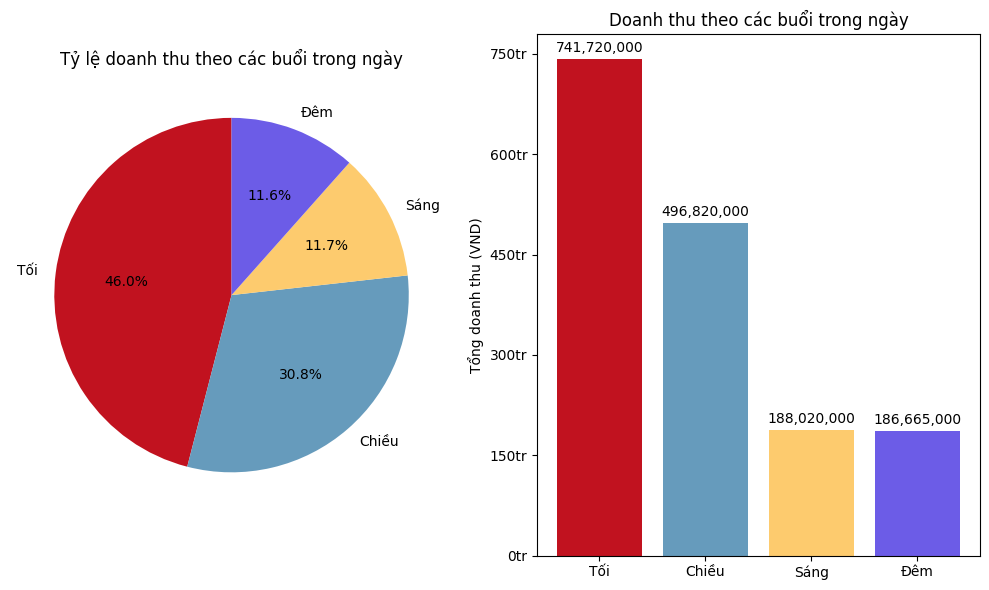

In [129]:
# Custom màu từng buổi (ví dụ 4 buổi: Sáng, Chiều, Tối, Đêm)
colors = ['#C1121F', '#669BBC', '#FDCB6E', '#6C5CE7'][:len(total_byday)]

# Nếu muốn tách phần nhỏ (< 5%)
explode = [0.08 if v/total_byday.values.sum() < 0.05 else 0 for v in total_byday.values]

# Vẽ figure
fig, ax = plt.subplots(figsize=(10,6), ncols=2)

# Pie chart với custom màu + explode
ax[0].pie(
    total_byday.values, 
    labels=total_byday.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode
)
ax[0].set_title("Tỷ lệ doanh thu theo các buổi trong ngày")

# Bar chart với cùng màu
total_byday_bar = ax[1].bar(
    total_byday.index, 
    total_byday.values, 
    color=colors
)
ax[1].set_title("Doanh thu theo các buổi trong ngày")
ax[1].set_ylabel("Tổng doanh thu (VND)")
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(150_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}tr"))

# Thêm nhãn số trên cột
ax[1].bar_label(
    total_byday_bar, 
    labels=[f"{v:,}" for v in total_byday.values],
    padding=3
)

plt.tight_layout()
plt.show()


__BAR CHART CHO DOANH THU THEO THẾ LOẠI PHIM__

In [ ]:
film['listed_in'].value_counts()
total_listed_in = film.groupby('listed_in')['ticket price'].sum()
total_listed_in = total_listed_in.sort_values(ascending=False)
print(total_listed_in)

C:\Users\Ngoc Minh\AppData\Local\Temp\ipykernel_15964\1530055793.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_genre.index, rotation=45, ha='right')


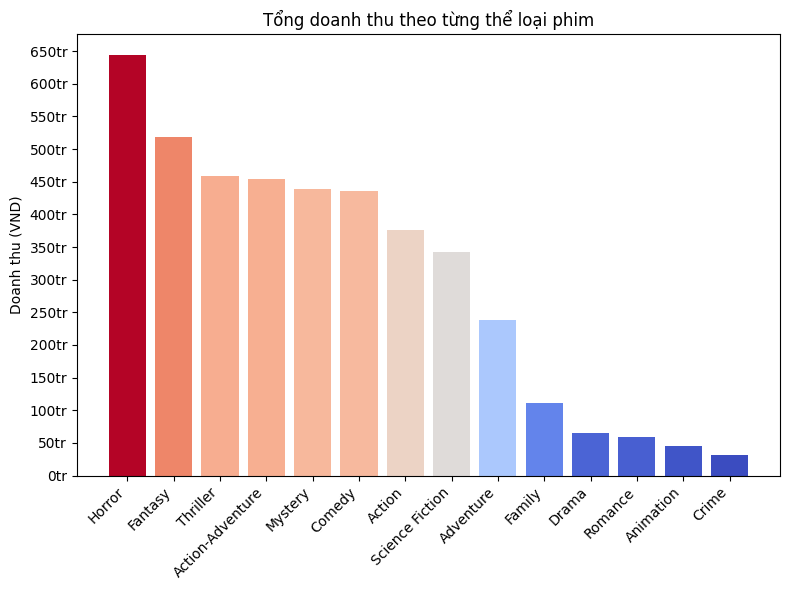

In [101]:
# Expand từng thể loại thành dòng riêng
film_expanded = film.assign(
    genre=film['listed_in'].str.split(', ')
).explode('genre')

# Tính tổng doanh thu theo từng thể loại
total_genre = film_expanded.groupby('genre')['ticket price'].sum().sort_values(ascending=False)

# Normalize giá trị để ánh xạ màu
norm = plt.Normalize(total_genre.values.min(), total_genre.values.max())
colors2 = cm.coolwarm(norm(total_genre.values)) 

fig, ax = plt.subplots(figsize=(8, 6))
total_genre_bar = ax.bar(total_genre.index, total_genre.values, color = colors2)

ax.set_title("Tổng doanh thu theo từng thể loại phim")
ax.set_ylabel("Doanh thu (VND)")
ax.set_xticklabels(total_genre.index, rotation=45, ha='right')
ax.yaxis.set_major_locator(ticker.MultipleLocator(50_000_000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))

plt.tight_layout()
plt.show()

__PIE CHART VÀ BAR CHART CHO DOANH THU THEO QUỐC GIA SẢN XUẤT PHIM__

In [132]:
total_bycountry = film.groupby('country')['ticket price'].sum()
total_bycountry = total_bycountry.sort_values(ascending=False)
print(total_bycountry)
180000 / film['ticket price'].sum() * 100

country
United States    1106840000
Thailand          177345000
Japan             173880000
Vietnam           122355000
Korea              32625000
Belgium              180000
Name: ticket price, dtype: int64


np.float64(0.011157774024082197)

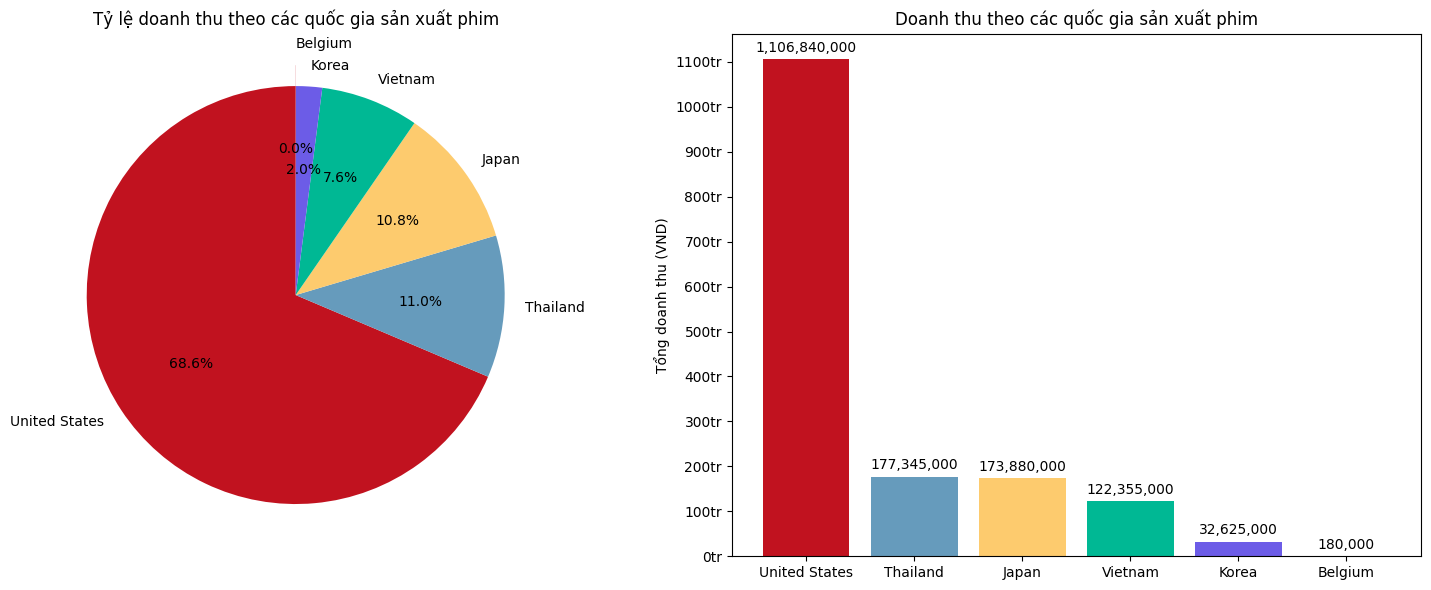

In [133]:
colors = ['#C1121F', '#669BBC', '#FDCB6E', '#00B894', '#6C5CE7']

explode = [0.1 if v/total_bycountry.values.sum() < 0.02 else 0 for v in total_bycountry.values]

fig, ax = plt.subplots(figsize=(15,6), ncols=2)

# Pie chart
ax[0].pie(
    total_bycountry.values, 
    labels=total_bycountry.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode
)
ax[0].set_title("Tỷ lệ doanh thu theo các quốc gia sản xuất phim")

# Bar chart
total_bycountry_bar = ax[1].bar(total_bycountry.index, total_bycountry.values, color=colors)
ax[1].set_title("Doanh thu theo các quốc gia sản xuất phim")
ax[1].set_ylabel("Tổng doanh thu (VND)")
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(100_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))
ax[1].bar_label(total_bycountry_bar, labels=[f"{v:,}" for v in total_bycountry.values], padding=3)

plt.tight_layout()
plt.show()


__BAR CHART CHO DOANH THU THEO BỘ PHIM__

In [32]:
film['title'] = film['title'].replace({
    'MẸ MA THAN KHÓC LA LLORONA (The Curse of La Llorona)': 'MẸ MA THAN KHÓC LA LLORONA',
    'CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (Godzilla: King of the Monster)': 'CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ',
    'ƯỚC HẸN MÙA THU (Autumn Promise)': 'ƯỚC HẸN MÙA THU',
    "(LT) DORAEMON: NOBITA VÀ MẶT TRĂNG PHIÊU LƯU KÝ (Doraemon: Nobita's Chronicle of the Moon Exploration)":'(LT) DORAEMON: NOBITA VÀ MẶT TRĂNG PHIÊU LƯU KÝ',
    'THẰNG EM LÝ TƯỞNG (Inseparable Bros)':'THẰNG EM LÝ TƯỞNG',
    'QUÝ CÔ LỪA ĐẢO (The Hustle)':'QUÝ CÔ LỪA ĐẢO',
    'NỤ HÔN MA QUÁI (Sang Krasue)':'NỤ HÔN MA QUÁI',
    "CORGI: NHỮNG CHÚ CHÓ HOÀNG GIA (The Queen's Corgi)": 'CORGI: NHỮNG CHÚ CHÓ HOÀNG GIA'
})

In [ ]:
total_title = film.groupby("title")['ticket price'].sum().sort_values(ascending=False)
print(total_title)

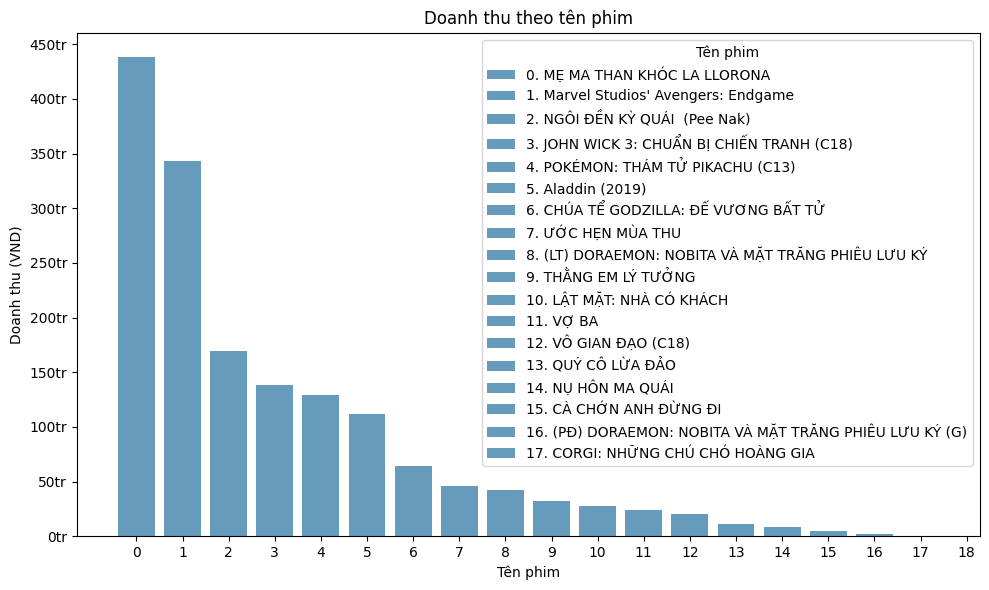

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))

# Gán số thứ tự cho mỗi phim
index_title = range(0, len(total_title.index) + 1)
total_title_barplot = ax.bar(total_title.index, total_title.values, color = "#669BBC")

ax.set_title("Doanh thu theo tên phim")
ax.set_xlabel("Tên phim")
ax.set_xticks(index_title)
ax.set_xticklabels(index_title)
ax.yaxis.set_major_locator(ticker.MultipleLocator(50_000_000))
# ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000:.0f}tr"))
# ax.bar_label(total_director_barplot, labels=[f"{v:,}" for v in total_director.values], padding=3)
ax.set_ylabel("Doanh thu (VND)")

# Tạo legend với mapping từ số thứ tự → tên phim
legend_title_labels = [f"{i}. {name}" for i, name in zip(index_title, total_title.index)]
ax.legend(total_title_barplot, legend_title_labels, title="Tên phim", bbox_to_anchor=(1,1), loc='upper right')

plt.tight_layout()
plt.show()

__THÔNG TIN PHIM CỦA RẠP__

In [62]:
film_info = film[['director', 'title', 'rating', 'listed_in', 'country']]

film_inf = pd.DataFrame(film_info.drop_duplicates())
film_inf.reset_index(drop=True, inplace=True)

film_inf.rename(columns={
    'director': 'Đạo diễn',
    'title': 'Tiêu đề',
    'rating': 'Phân loại',
    'listed_in': 'Thể loại',
    'country': 'Quốc gia'
}, inplace=True)

film_inf

,Đạo diễn,Tiêu đề,Phân loại,Thể loại,Quốc gia
0,"Anthony Russo, Joe Russo",Marvel Studios' Avengers: Endgame,PG-13,"Action-Adventure, Fantasy, Science Fiction",United States
1,Chad Stahelski,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),R,Action,United States
2,Phontharis Chotkijsadarsopon,NGÔI ĐỀN KỲ QUÁI (Pee Nak),PG-13,"Comedy, Horror",Thailand
3,Trần Việt Anh,VÔ GIAN ĐẠO (C18),C18,"Comedy, Crime, Thriller",Vietnam
4,Michael Chaves,MẸ MA THAN KHÓC LA LLORONA,R,"Horror, Mystery, Thriller",United States
5,Rob Letterman,POKÉMON: THÁM TỬ PIKACHU (C13),PG,"Action, Adventure, Comedy",Japan
6,Guy Ritchie,Aladdin (2019),PG,"Action-Adventure, Family, Fantasy",United States
7,Yook Sang-hyo,THẰNG EM LÝ TƯỞNG,PG-13,"Comedy, Drama",Korea
8,Nguyễn Quang Dũng,ƯỚC HẸN MÙA THU,C16,"Comedy, Romance",Vietnam
9,Chris Addison,QUÝ CÔ LỪA ĐẢO,PG-13,"Comedy, Crime",United States


__BAR CHART CHO SỐ LƯỢNG VÉ CHO TỪNG BỘ PHIM__

In [ ]:
title_count = film.groupby('title')['ticketcode'].count().sort_values(ascending=False)
print(title_count)

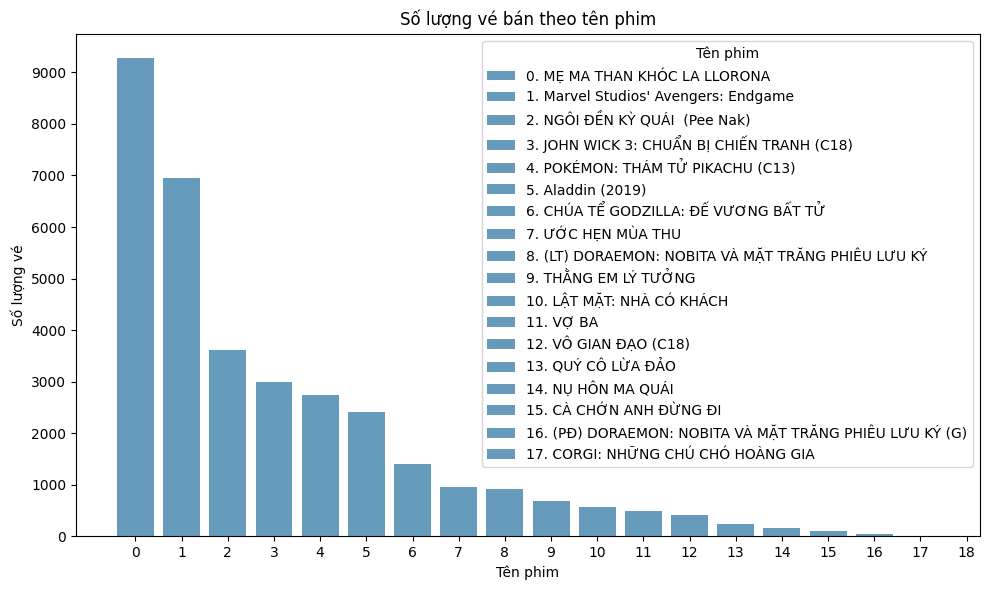

In [108]:
fig, ax = plt.subplots(figsize=(10, 6))

# Gán số thứ tự cho mỗi phim
index_title_count = range(0, len(title_count.index) + 1)
total_title_count_barplot = ax.bar(title_count.index, title_count.values, color = "#669BBC")

ax.set_title("Số lượng vé bán theo tên phim")
ax.set_xlabel("Tên phim")
ax.set_xticks(index_title_count)
ax.set_xticklabels(index_title_count)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
# ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1000000000:.1f} tỷ"))
# ax.bar_label(total_director_barplot, labels=[f"{v:,}" for v in total_director.values], padding=3)
ax.set_ylabel("Số lượng vé")

# Tạo legend với mapping từ số thứ tự → tên phim
legend_title_labels_count = [f"{i}. {name}" for i, name in zip(index_title_count, title_count.index)]
ax.legend(total_title_count_barplot, legend_title_labels, title="Tên phim", bbox_to_anchor=(1,1), loc='upper right')

plt.tight_layout()
plt.show()

__PIE CHART VÀ BAR CHART CHO DOANH THU THEO TỪNG QUẬN/HUYỆN CỦA TỈNH ĐÀ NẴNG__

In [ ]:
total_province = film.groupby("Quận/Huyện")['ticket price'].sum().sort_values(ascending=False)
print(total_province)

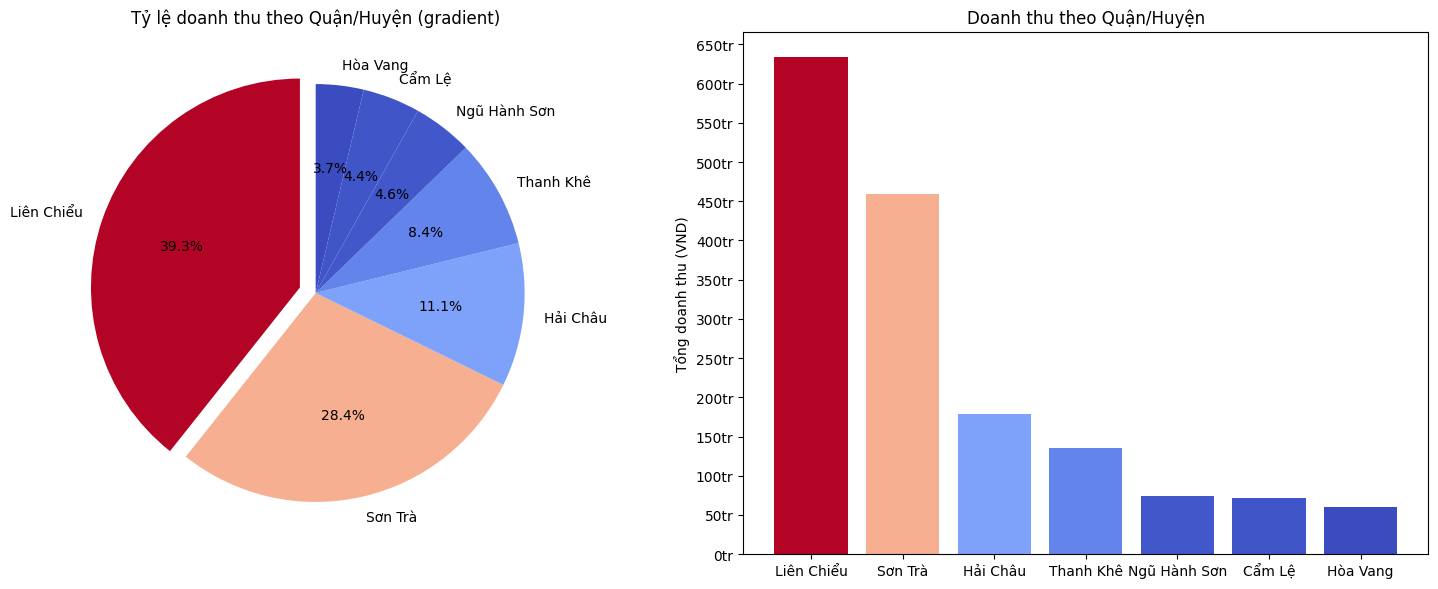

In [135]:
fig, ax = plt.subplots(figsize=(15,6), ncols=2, nrows=1)

# Normalize giá trị → màu
norm = plt.Normalize(total_province.values.min(), total_province.values.max())
colors3 = cm.coolwarm(norm(total_province.values))  # chính là gradient colormap

explode = [0.08 if v == max(total_province.values) else 0 for v in total_province.values]

# Pie chart với gradient màu
ax[0].pie(
    total_province.values, 
    labels=total_province.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors3
)
ax[0].set_title("Tỷ lệ doanh thu theo Quận/Huyện (gradient)")

# Bar chart cùng màu
total_province_bar = ax[1].bar(
    total_province.index, 
    total_province.values, 
    color=colors3
)
ax[1].set_title("Doanh thu theo Quận/Huyện")
ax[1].set_ylabel("Tổng doanh thu (VND)")
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(50_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}tr"))

plt.tight_layout()
plt.show()


__LINE CHART CHO TỶ LỆ LẤP ĐẦY PHÒNG THEO CÁC THỜI ĐIỂM TRONG NGÀY (SÁNG, CHIỀU, TỐI, ĐÊM) CỦA TỪNG PHÒNG (1,2,3,4) TRONG RẠP PHIM__

In [ ]:
total_seats_per_room = film.groupby('room')['slot'].nunique()
total_seats_per_room = pd.DataFrame(total_seats_per_room)

# Tính tổng số vé đã bán theo ngày, từng phòng
seats_sold = film.groupby(['Time of day', 'room'])['slot'].count().reset_index(name='seats_sold')

# Gộp với tổng số ghế phòng
result = pd.merge(seats_sold, total_seats_per_room, on='room', how='left')

# Tính tỉ lệ lấp đầy
result['fill_rate'] = result['seats_sold'] / result['slot']
result = pd.DataFrame(result)
# Hiển thị kết quả
print(result)

C:\Users\Ngoc Minh\AppData\Local\Temp\ipykernel_15964\1614534112.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(result['Time of day'].unique()))


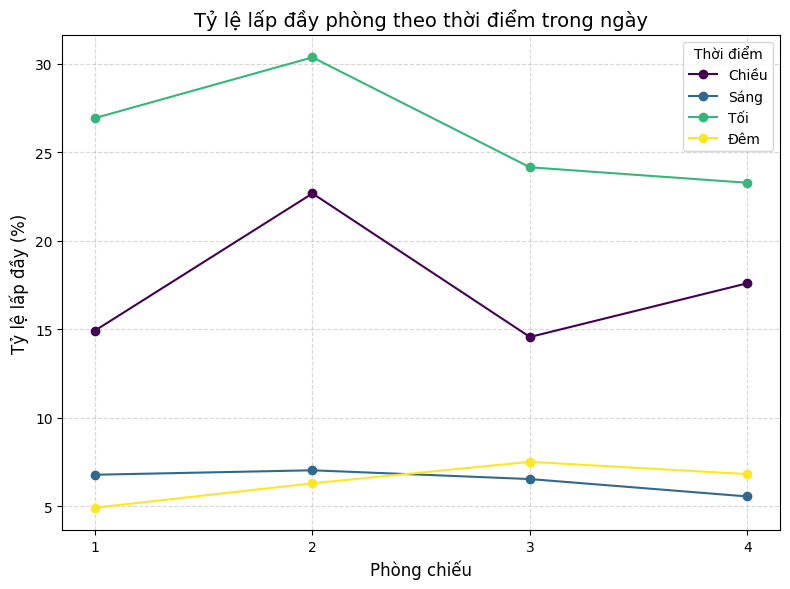

In [139]:
# Tạo colormap theo số line
cmap = cm.get_cmap('viridis', len(result['Time of day'].unique()))

# Vẽ line chart
fig, ax = plt.subplots(figsize=(8, 6))
for idx, time in enumerate(result['Time of day'].unique()):
    sub_df = result[result['Time of day'] == time]
    ax.plot(
        sub_df['room'], sub_df['fill_rate'],
        marker='o', linestyle='-', 
        label=time,
        color=cmap(idx)  # lấy màu theo colormap
    )

ax.set_title('Tỷ lệ lấp đầy phòng theo thời điểm trong ngày', fontsize=14)
ax.set_xlabel('Phòng chiếu', fontsize=12)
ax.set_ylabel('Tỷ lệ lấp đầy (%)', fontsize=12)
ax.set_xticks([1, 2, 3, 4])
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Thời điểm')

plt.tight_layout()
plt.show()
